In [1]:
import os
from scipy.special import logsumexp

# change to the root folder
os.chdir("..")

from tests.test_zestimation import *

In [2]:
# plotting styles
import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline

mpl.rcParams['figure.dpi']= 150

In [3]:
# Model setup: read a spectrum, setup GP model
# ----
# read a spectrum from SDSS DR12
nspec = 2
# path to the learned GP model
learned_file = "data/dr12q/processed/learned_zqso_only_model_outdata_full_dr9q_minus_concordance_norm_1176-1256.mat"

# filenames is an array for a list of spectra, and we take one of them here
filename = filenames[nspec]

# If we haven't downloaded the file, this cell will help you download the file from SDSS database
if not os.path.exists(filename):
    plate, mjd, fiber_id = re.findall(
        r"spec-([0-9]+)-([0-9]+)-([0-9]+).fits", filename,
    )[0]
    retrieve_raw_spec(int(plate), int(mjd), int(fiber_id))

# make sure the file exists
assert os.path.exists(filename) == True

# read the raw spectrum
wavelengths, flux, noise_variance, pixel_mask = read_spec(filename)

# Initialize the model parameters
params = ZParameters()
z_qso_samples = ZSamples(params)

# load the model
z_qso_gp = ZGPMAT(
    params,
    z_qso_samples,
    learned_file=learned_file,
)

# Mean flux parameter demos

In [4]:
wavelengths = z_qso_gp.rest_wavelengths
flux        = z_qso_gp.mu

meanflux = lambda z,tau_0, beta : tau_0 * (1 + z)**beta

def plot_meanflux(
    wavelengths: np.ndarray, flux: np.ndarray, z: float, tau_0: float = 0.0023, beta: float = 3.65, **kwargs
) -> None:
    """
    wavelength: rest frame wavelengths
    flux: quasar emission
    z: redshift of the quasar
    tau_0, beta:  power-law parameters for the suppression of lyman alpha forest
    """

    # Lyman alpha absorber wavelegth is 1216A
    lya_wavelength = 1216

    # absorber redshifts
    z_lya = wavelengths * (1 + z) / lya_wavelength

    # only <= 1216 works
    suppress = meanflux(z_lya, tau_0, beta) # values between 0 ~ 1
    ind = (wavelengths <= 1216)
    suppress[~ind] = 0

    plt.plot(wavelengths, flux * np.exp(- suppress), **kwargs)

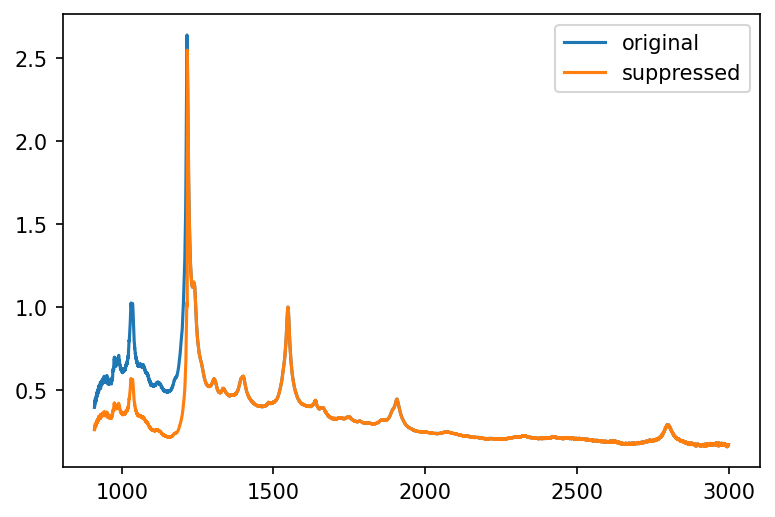

In [5]:
plt.plot(wavelengths, flux, label="original")
plot_meanflux(wavelengths, flux, z=3.2, tau_0=0.0023, beta=3.65, label="suppressed")
plt.legend()

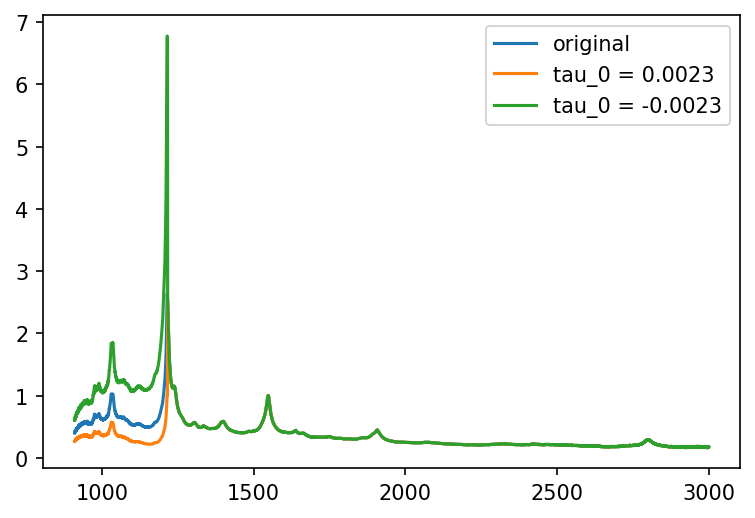

In [6]:
plt.plot(wavelengths, flux, label="original")
plot_meanflux(wavelengths, flux, z=3.2, tau_0=0.0023, beta=3.65, label="tau_0 = {:.3g}".format(0.0023))
plot_meanflux(wavelengths, flux, z=3.2, tau_0=-0.0023, beta=3.65, label="tau_0 = {:.3g}".format(-0.0023))
plt.legend()

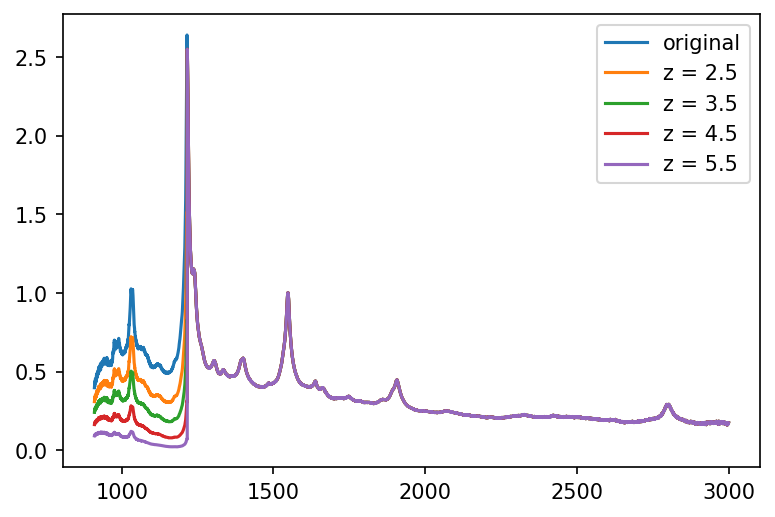

In [7]:
plt.plot(wavelengths, flux, label="original")
for z in [2.5, 3.5 , 4.5, 5.5]:
    plot_meanflux(wavelengths, flux, z=z, tau_0=0.0023, beta=3.65, label="z = {:.3g}".format(z))
    plt.legend()

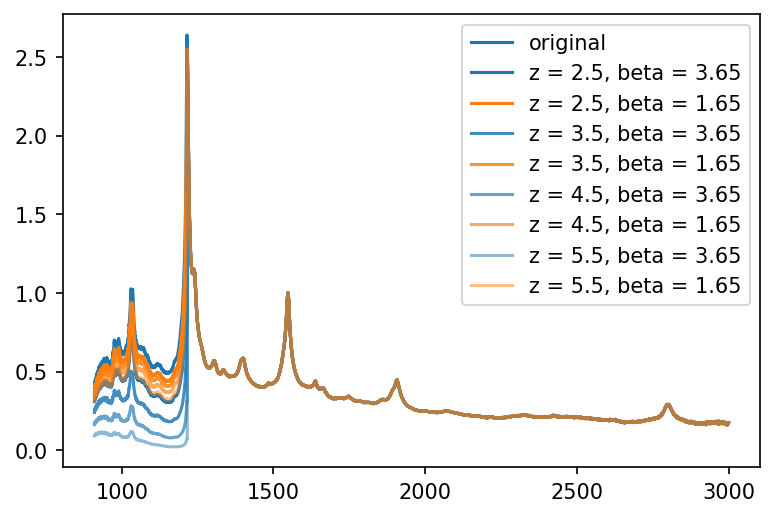

In [8]:
plt.plot(wavelengths, flux, label="original")
for i,z in enumerate([2.5, 3.5 , 4.5, 5.5]):
    plot_meanflux(wavelengths, flux, z=z, tau_0=0.0023, beta=3.65, label="z = {:.3g}, beta = {:.3g}".format(z, 3.65), alpha=(1 - i/6), color="C0")
    plot_meanflux(wavelengths, flux, z=z, tau_0=0.0023, beta=2.65, label="z = {:.3g}, beta = {:.3g}".format(z, 1.65), alpha=(1 - i/6), color="C1")
    plt.legend()